## Processing train data

In [1]:
### autoreloader
%load_ext autoreload
%autoreload 2

In [2]:
### setting up the system path
import sys
sys.path.append('../')

In [3]:
### importing the functions from the src files
from src.basic.essential import load_data, get_nan_duplicates_shape, get_info, drop_cols, save_data
from src.processing.process_categorical import get_nunique_value_counts, check_feature_cardionality, apply_label_encoding, nunique_value_counts_compare
from src.processing.track_nan import track_nan
from src.processing.plot_numericals import plot_graphs, plot_graphs_post_operations
from src.processing.transform_scale import apply_transform_boxcox, remove_outliers, scale_train

In [4]:
### setting up the data path
train_path = '../data/split_global/train.csv'

In [5]:
### loading the data
train = load_data(train_path)
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-117.07,32.71,36.0,2448.0,475.0,1268.0,450.0,2.5682,109100.0,NEAR OCEAN
1,-120.05,36.96,37.0,1000.0,261.0,1092.0,233.0,1.4267,52300.0,INLAND
2,-122.15,37.74,41.0,856.0,178.0,571.0,191.0,3.1458,130600.0,NEAR BAY
3,-118.27,33.95,35.0,2073.0,494.0,1753.0,490.0,1.5000,93600.0,<1H OCEAN
4,-117.01,32.78,20.0,2616.0,597.0,1532.0,579.0,2.9896,235600.0,<1H OCEAN


In [6]:
### making a copy for the comparison part
train_copy = train.copy()
train_copy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-117.07,32.71,36.0,2448.0,475.0,1268.0,450.0,2.5682,109100.0,NEAR OCEAN
1,-120.05,36.96,37.0,1000.0,261.0,1092.0,233.0,1.4267,52300.0,INLAND
2,-122.15,37.74,41.0,856.0,178.0,571.0,191.0,3.1458,130600.0,NEAR BAY
3,-118.27,33.95,35.0,2073.0,494.0,1753.0,490.0,1.5000,93600.0,<1H OCEAN
4,-117.01,32.78,20.0,2616.0,597.0,1532.0,579.0,2.9896,235600.0,<1H OCEAN


In [7]:
### checking the nan, duplicates and shape
get_nan_duplicates_shape(train)

shape : (15480, 10) 
duplicates : 0 
Nan values : 
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [8]:
### getting the info
get_info(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15480 non-null  float64
 1   latitude            15480 non-null  float64
 2   housing_median_age  15480 non-null  float64
 3   total_rooms         15480 non-null  float64
 4   total_bedrooms      15322 non-null  float64
 5   population          15480 non-null  float64
 6   households          15480 non-null  float64
 7   median_income       15480 non-null  float64
 8   median_house_value  15480 non-null  float64
 9   ocean_proximity     15480 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


In [9]:
### fixing the nan values in the 'total_bedrooms' with the mode, as the values are only 158
train['total_bedrooms'] = train['total_bedrooms'].fillna(train['total_bedrooms'].mode()[0])

In [10]:
### checking the nan again and tracking them
track_nan(train, train_copy)

,after_fix,before_fix
longitude,0,0
latitude,0,0
housing_median_age,0,0
total_rooms,0,0
total_bedrooms,0,158
population,0,0
households,0,0
median_income,0,0
median_house_value,0,0
ocean_proximity,0,0


In [11]:
### handling the categoricals : 'Ocean Proximity'
### checking the nunique and the value_counts
get_nunique_value_counts(train, 'ocean_proximity')

(5,
 ocean_proximity
 <1H OCEAN     6860
 INLAND        4894
 NEAR OCEAN    1967
 NEAR BAY      1754
 ISLAND           5
 Name: count, dtype: int64)

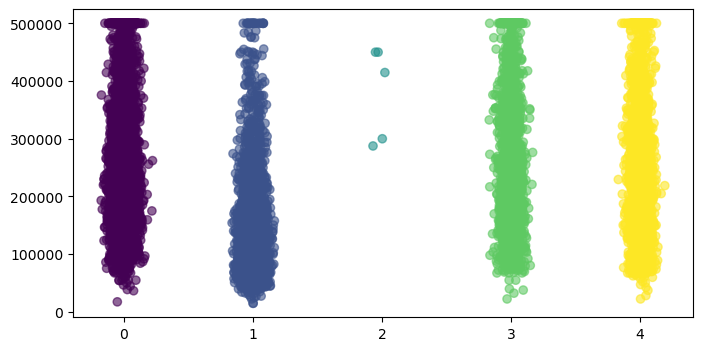

In [12]:
### plotting the graph to check the cardionality
check_feature_cardionality(train, 'ocean_proximity', 'median_house_value')

In [13]:
### based on the graph, assigining the 'NEAR OCEAN' and the 'ISLAND' as the same ranking
labels_ocean_proximity = {
'<1H OCEAN' : 1,
'INLAND' : 0,
'NEAR OCEAN' : 3,
'NEAR BAY' : 2,
'ISLAND' :  3
}

In [14]:
### applying the label encoding
apply_label_encoding(train, 'ocean_proximity', labels = labels_ocean_proximity)
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-117.07,32.71,36.0,2448.0,475.0,1268.0,450.0,2.5682,109100.0,3
1,-120.05,36.96,37.0,1000.0,261.0,1092.0,233.0,1.4267,52300.0,0
2,-122.15,37.74,41.0,856.0,178.0,571.0,191.0,3.1458,130600.0,2
3,-118.27,33.95,35.0,2073.0,494.0,1753.0,490.0,1.5000,93600.0,1
4,-117.01,32.78,20.0,2616.0,597.0,1532.0,579.0,2.9896,235600.0,1


In [15]:
### comparing the value, pre and post labelling
nunique_value_counts_compare(train, train_copy, 'ocean_proximity')

before : 
No. of categories : 5 
value_counts : 
ocean_proximity
<1H OCEAN     6860
INLAND        4894
NEAR OCEAN    1967
NEAR BAY      1754
ISLAND           5
Name: count, dtype: int64
after : 
No. of categories : 4 
value_counts : 
ocean_proximity
1    6860
0    4894
3    1972
2    1754
Name: count, dtype: int64


##### ************ work on train tree data **************

In [16]:
### saving one copy of this data as the model ready data for the tress
train_tree = train.copy()
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-117.07,32.71,36.0,2448.0,475.0,1268.0,450.0,2.5682,109100.0,3
1,-120.05,36.96,37.0,1000.0,261.0,1092.0,233.0,1.4267,52300.0,0
2,-122.15,37.74,41.0,856.0,178.0,571.0,191.0,3.1458,130600.0,2
3,-118.27,33.95,35.0,2073.0,494.0,1753.0,490.0,1.5000,93600.0,1
4,-117.01,32.78,20.0,2616.0,597.0,1532.0,579.0,2.9896,235600.0,1


column : longitude


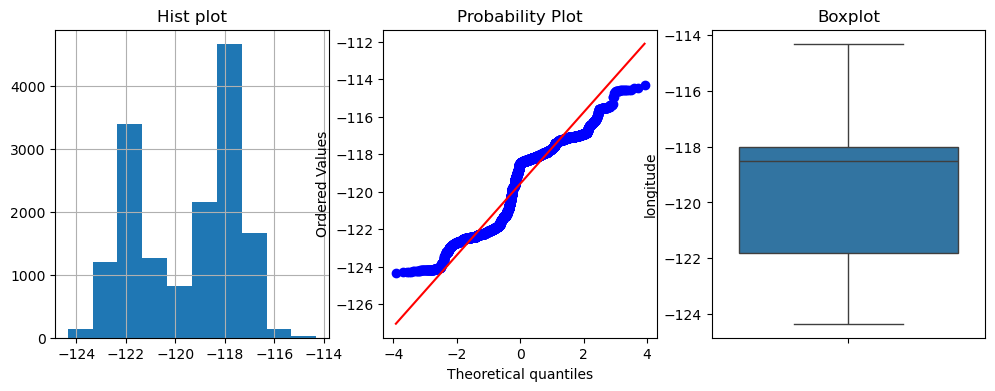

column : latitude


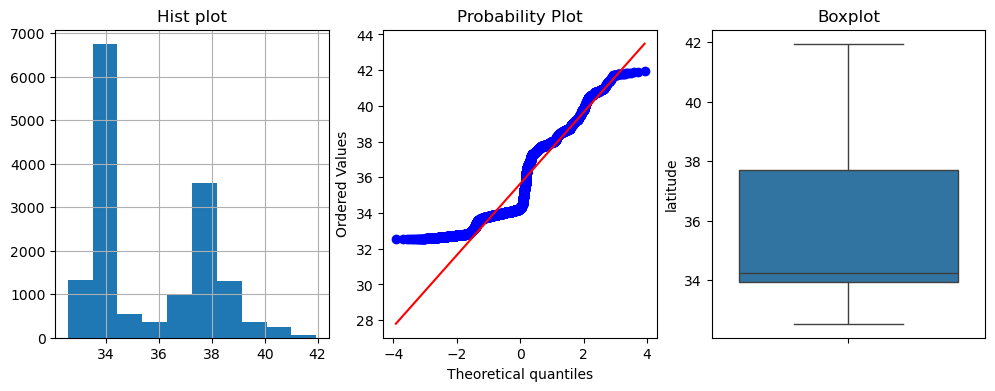

column : housing_median_age


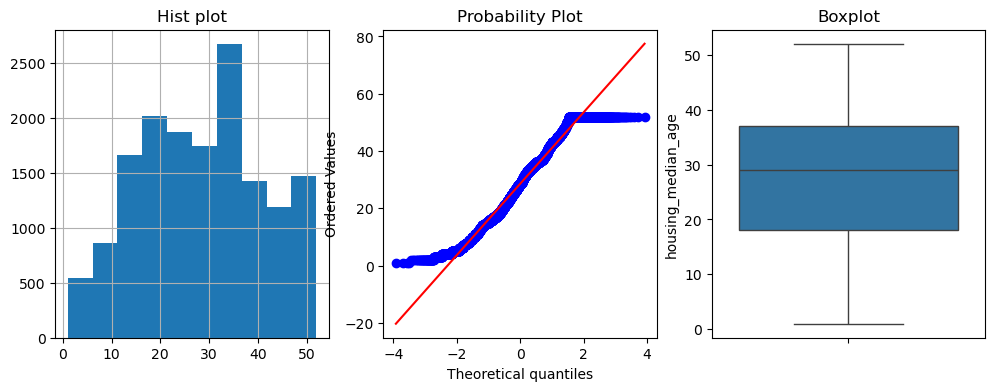

column : total_rooms


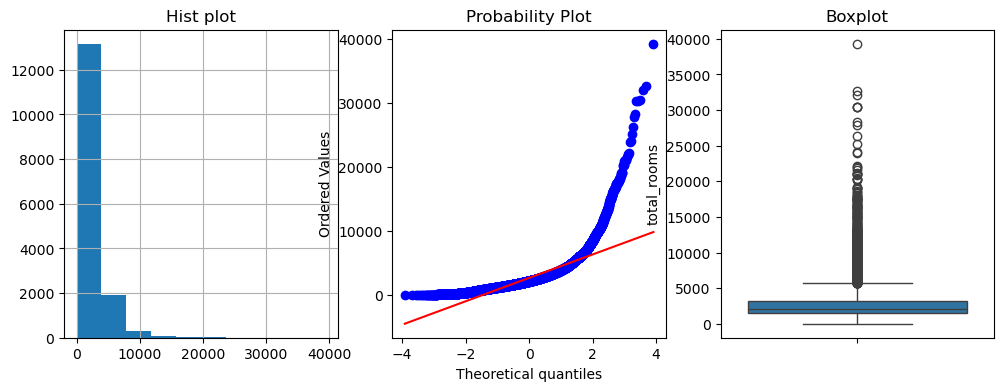

column : total_bedrooms


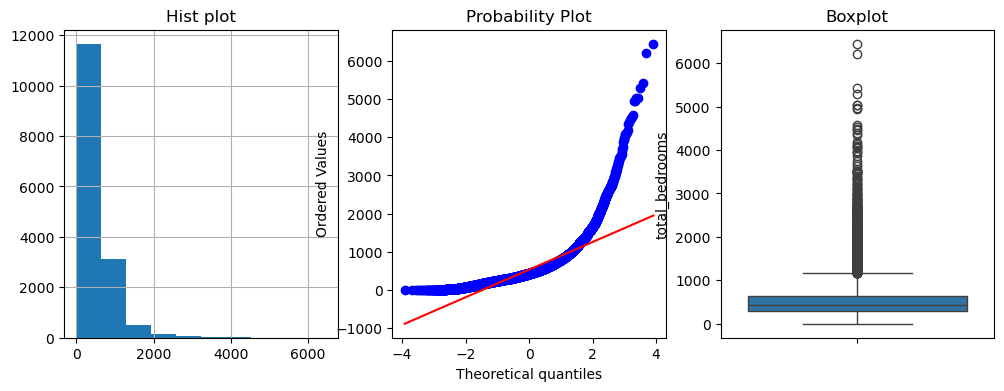

column : population


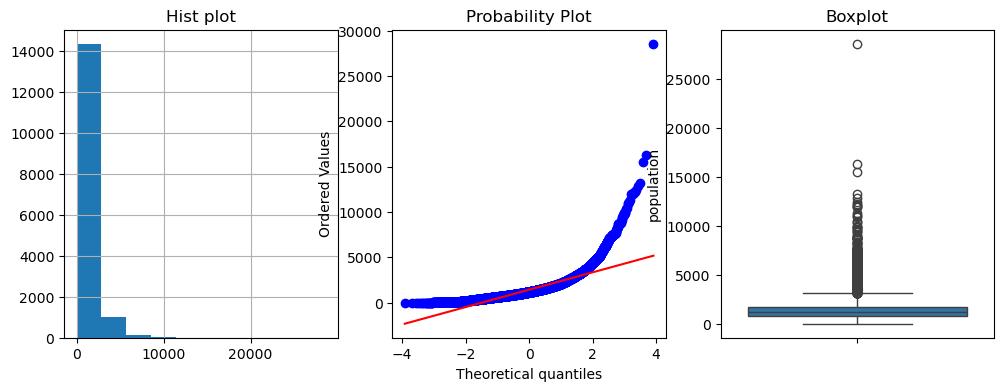

column : households


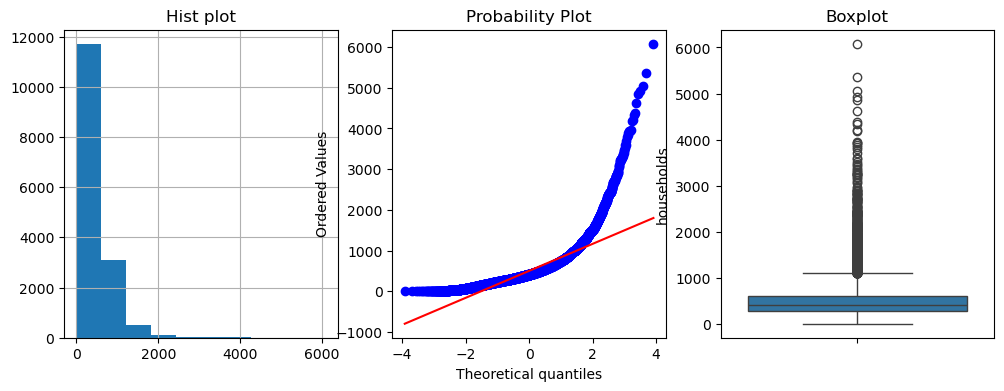

column : median_income


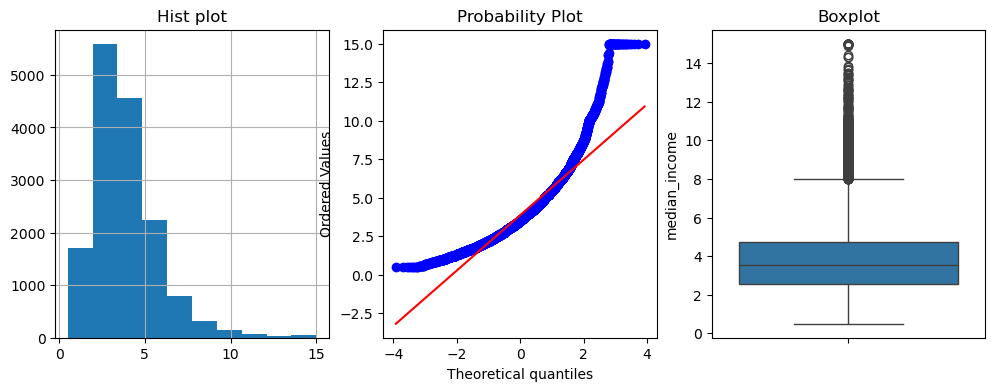

column : median_house_value


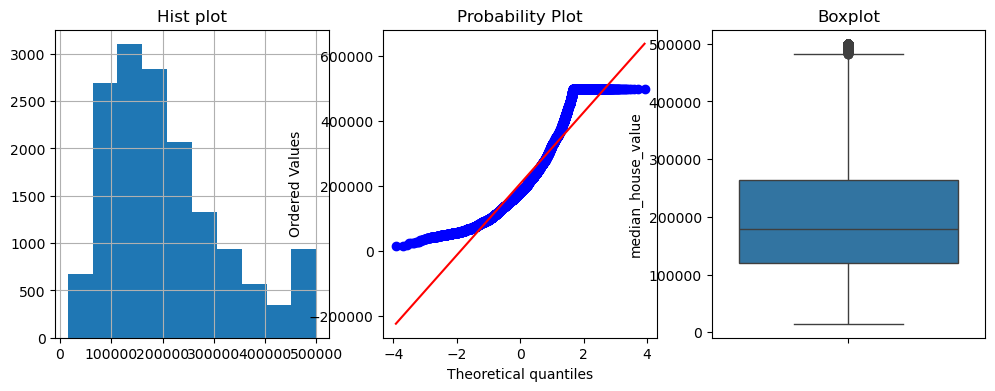

In [17]:
### plotting the graphs for the train data
plot_graphs(train)

In [18]:
### setting up the path to save 
train_tree_path = '../data/model_ready/train_tree.csv'

In [19]:
### saving the data
save_data(train_tree, train_tree_path)

In [20]:
### loading it again and rechecking
train_tree = load_data(train_tree_path)
train_tree.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-117.07,32.71,36.0,2448.0,475.0,1268.0,450.0,2.5682,109100.0,3
1,-120.05,36.96,37.0,1000.0,261.0,1092.0,233.0,1.4267,52300.0,0
2,-122.15,37.74,41.0,856.0,178.0,571.0,191.0,3.1458,130600.0,2
3,-118.27,33.95,35.0,2073.0,494.0,1753.0,490.0,1.5000,93600.0,1
4,-117.01,32.78,20.0,2616.0,597.0,1532.0,579.0,2.9896,235600.0,1


In [21]:
### checking the nan and the duplicates and shape
get_nan_duplicates_shape(train_tree)

shape : (15480, 10) 
duplicates : 0 
Nan values : 
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


##### ************* work on distance train data ***************

In [22]:
### making another copy of the data to process for the distance based models
train_distance = train.copy()
train_distance.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-117.07,32.71,36.0,2448.0,475.0,1268.0,450.0,2.5682,109100.0,3
1,-120.05,36.96,37.0,1000.0,261.0,1092.0,233.0,1.4267,52300.0,0
2,-122.15,37.74,41.0,856.0,178.0,571.0,191.0,3.1458,130600.0,2
3,-118.27,33.95,35.0,2073.0,494.0,1753.0,490.0,1.5000,93600.0,1
4,-117.01,32.78,20.0,2616.0,597.0,1532.0,579.0,2.9896,235600.0,1


column : longitude


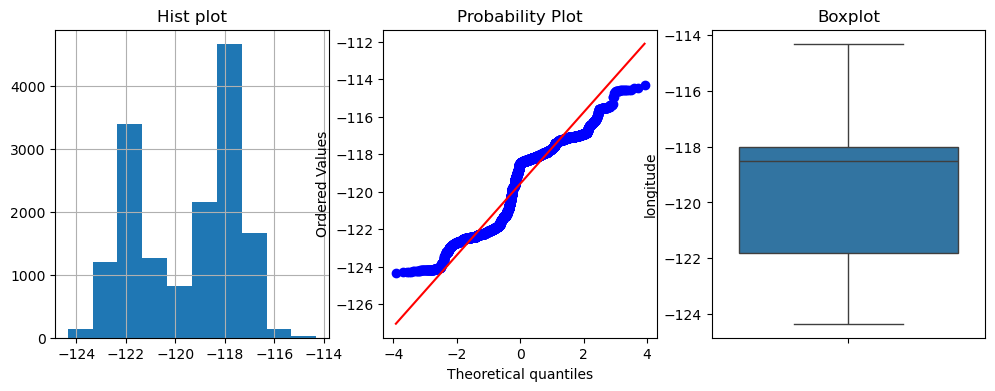

column : latitude


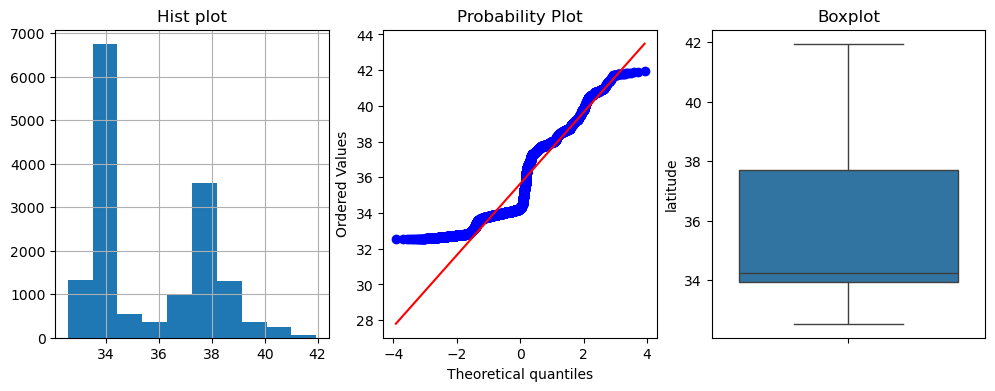

column : housing_median_age


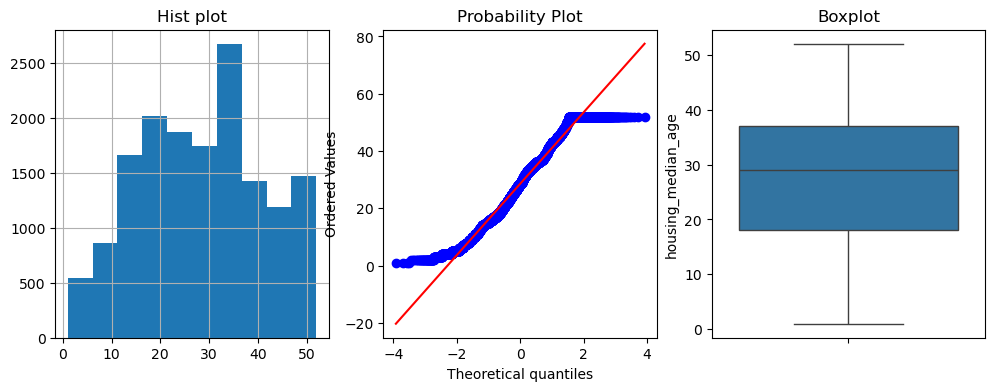

column : total_rooms


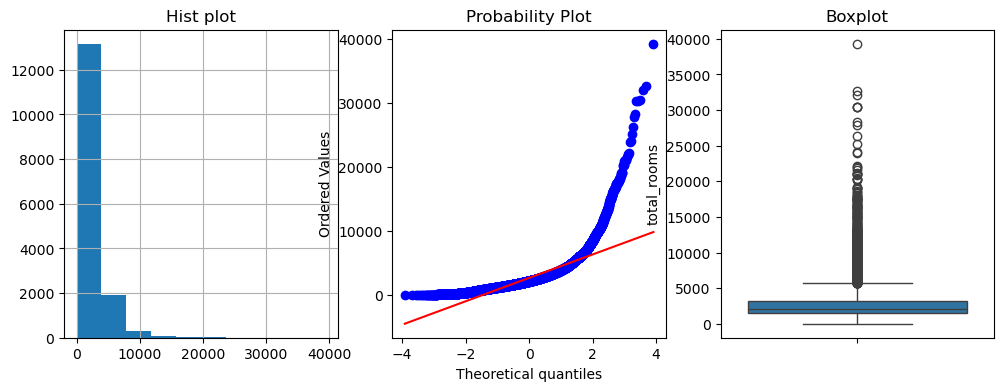

column : total_bedrooms


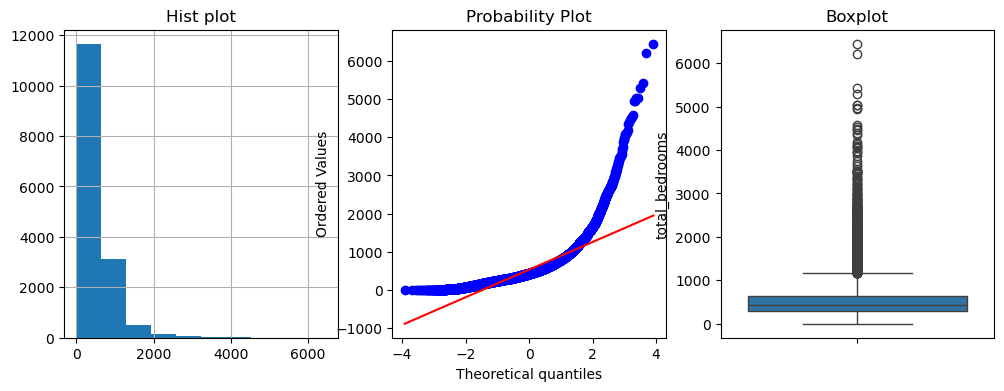

column : population


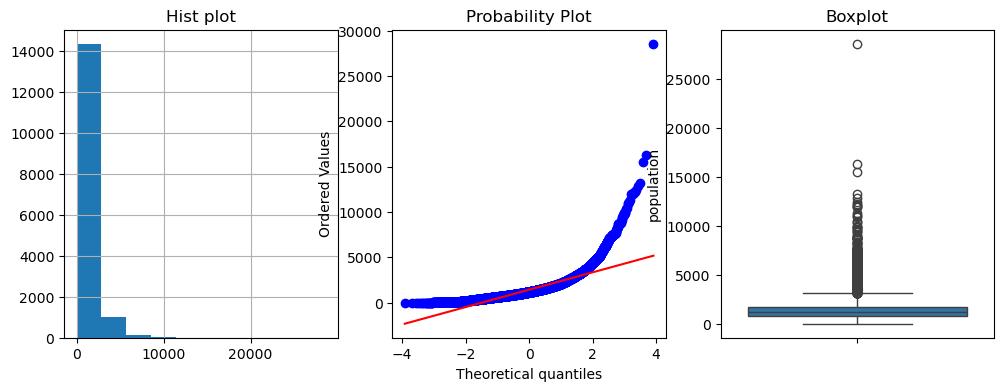

column : households


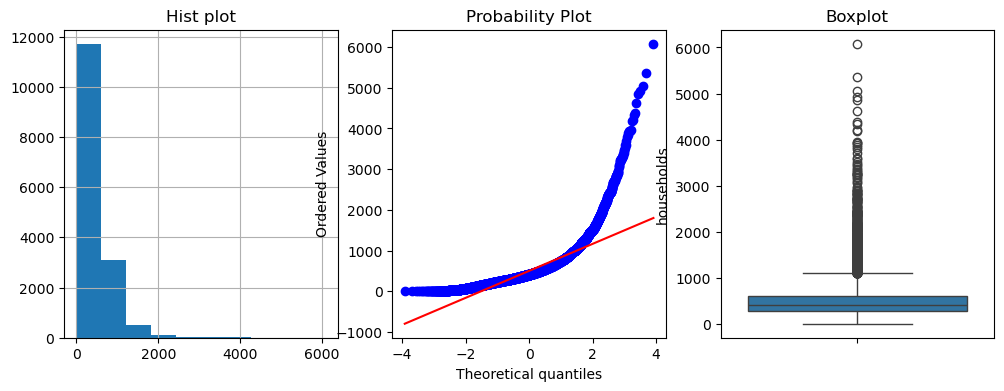

column : median_income


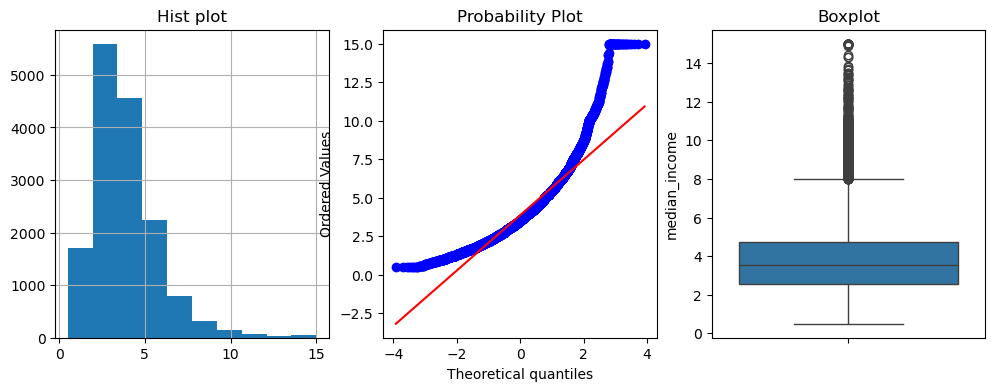

column : median_house_value


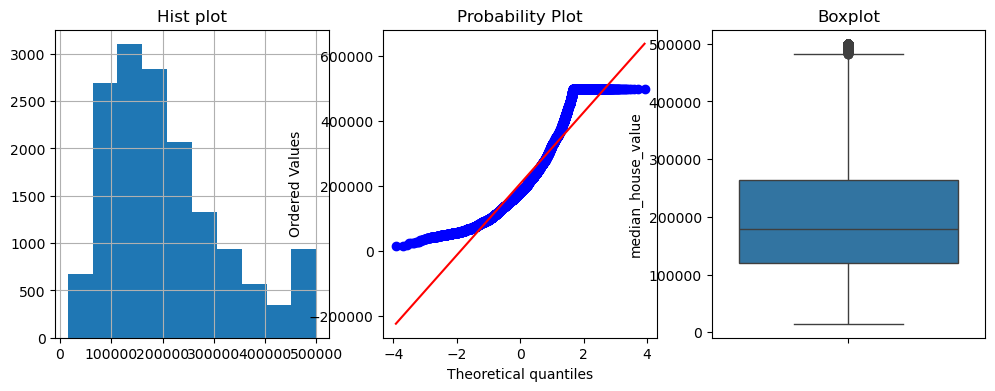

In [23]:
### plotting again to figure out the transformations
plot_graphs(train_distance)

In [24]:
### we will apply the boxcox transformations on the following columns : 
### ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

In [25]:
### cols to apply the transformations
cols_to_tansform = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

In [26]:
### applying the transformations
apply_transform_boxcox(train_distance, cols_to_tansform)
train_distance.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-117.07,32.71,36.0,21.194942,13.178600,19.448080,14.222349,1.126987,109100.0,3
1,-120.05,36.96,37.0,16.532098,10.986256,18.602194,11.495493,0.814349,52300.0,0
2,-122.15,37.74,41.0,15.813680,9.731632,15.271727,10.756101,1.242460,130600.0,2
3,-118.27,33.95,35.0,20.256562,13.332698,21.391763,14.608811,0.839324,93600.0,1
4,-117.01,32.78,20.0,21.579428,14.096047,20.564253,15.390273,1.213222,235600.0,1


column : longitude


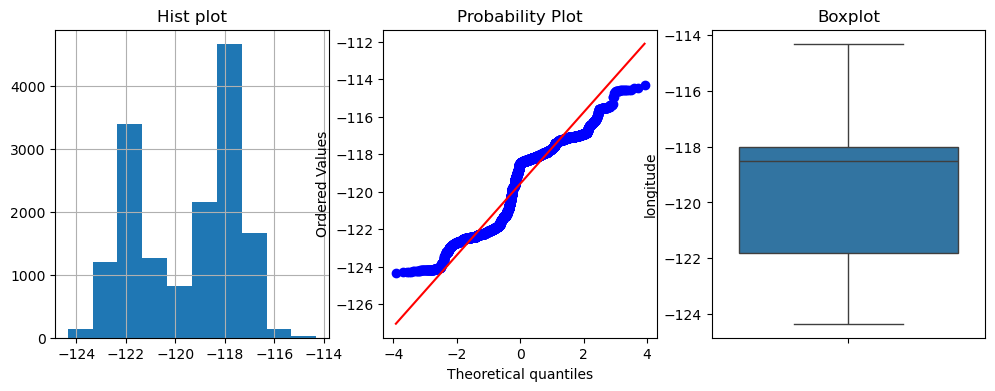

column : latitude


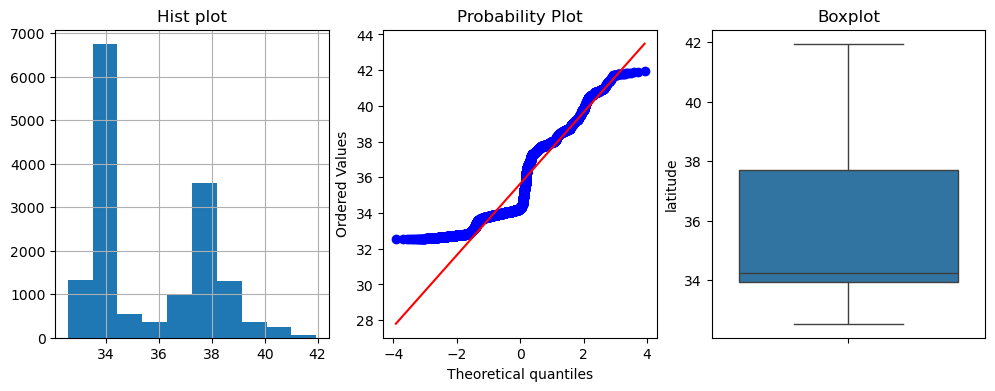

column : housing_median_age


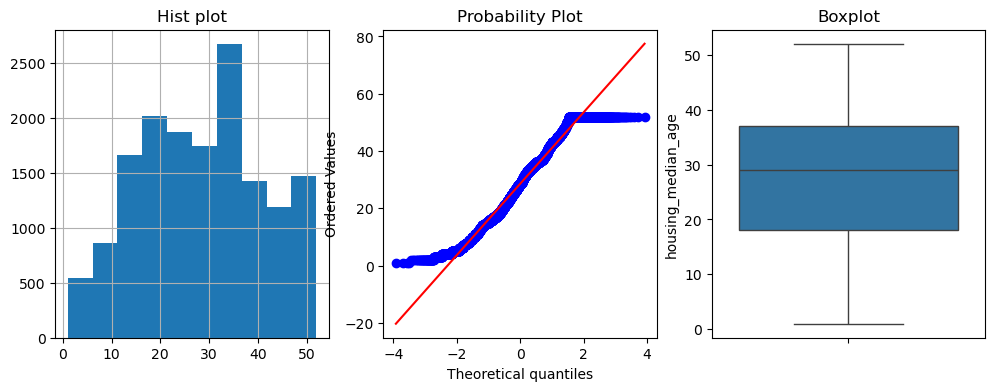

column : total_rooms


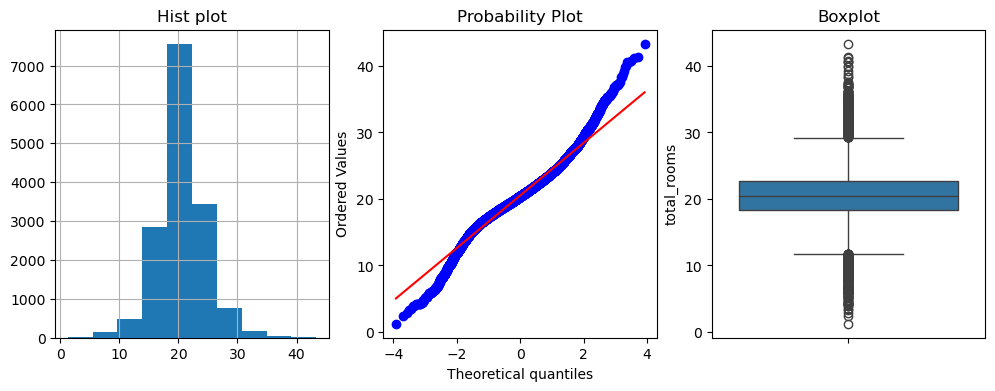

column : total_bedrooms


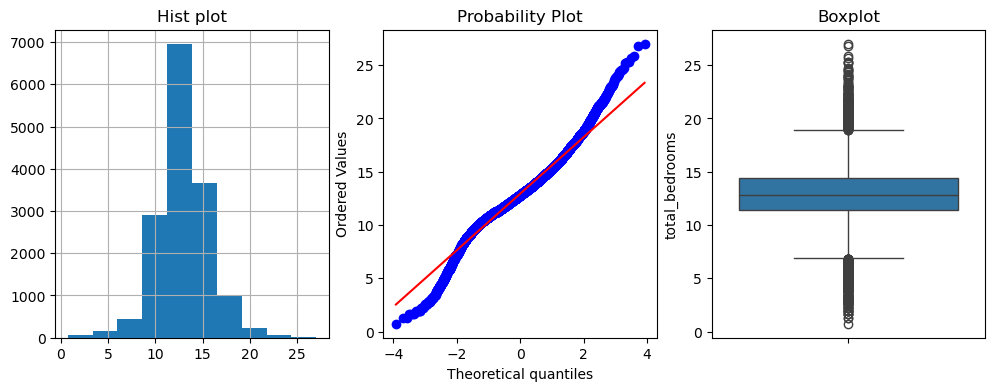

column : population


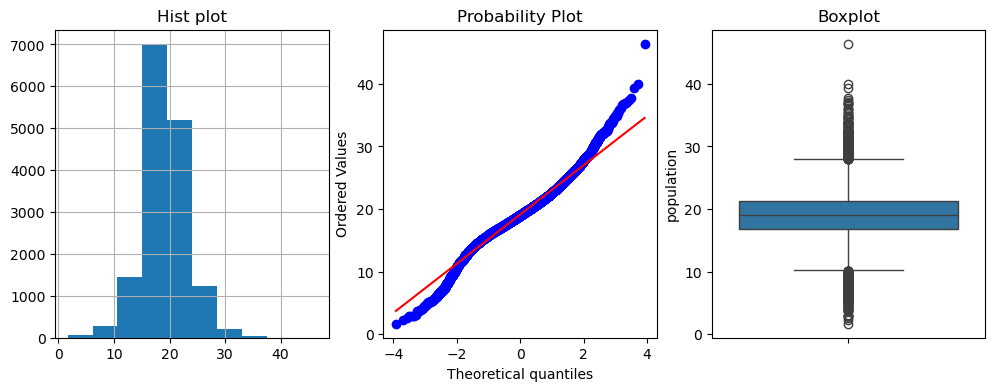

column : households


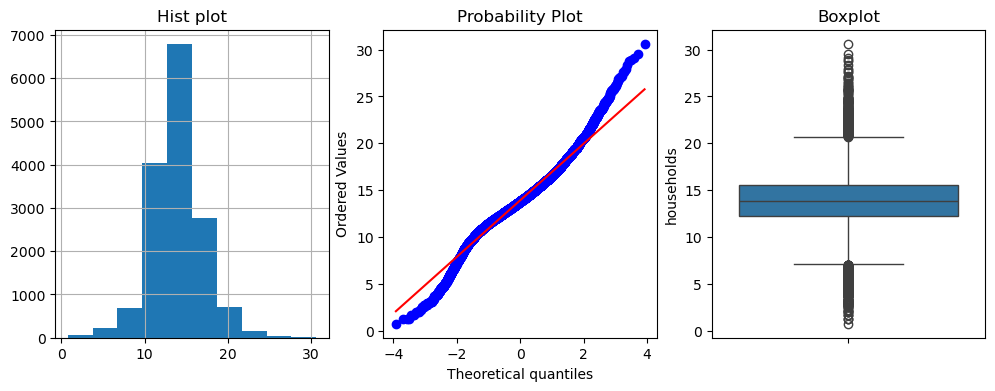

column : median_income


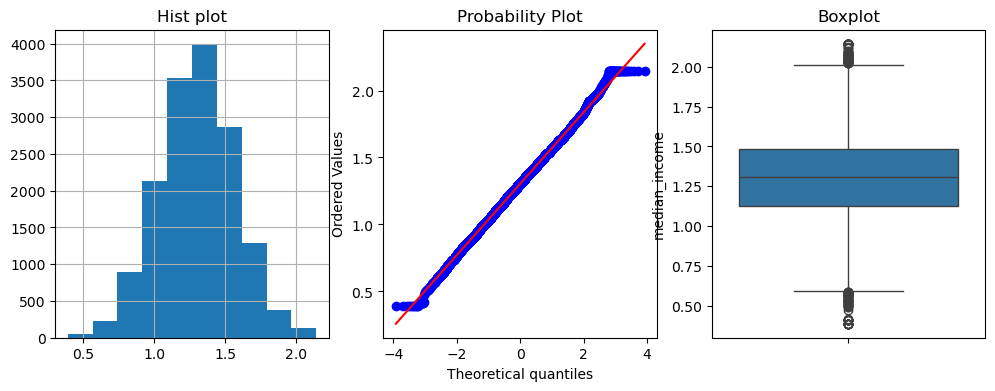

column : median_house_value


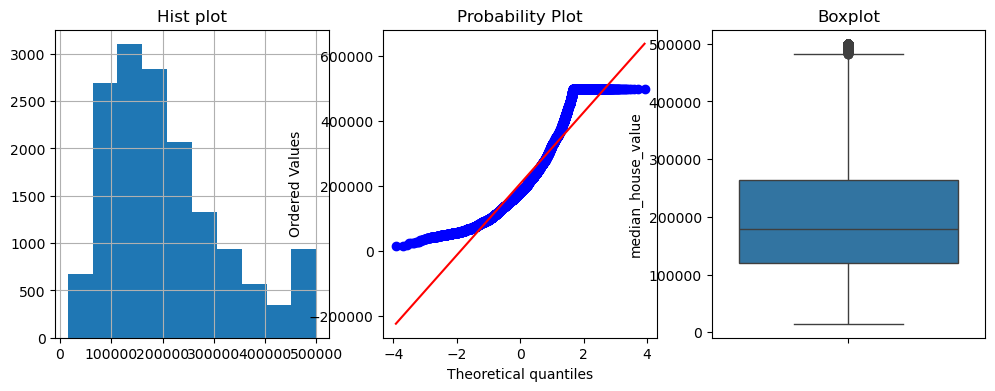

In [27]:
### plotting the transformed columns
plot_graphs(train_distance)

column : longitude


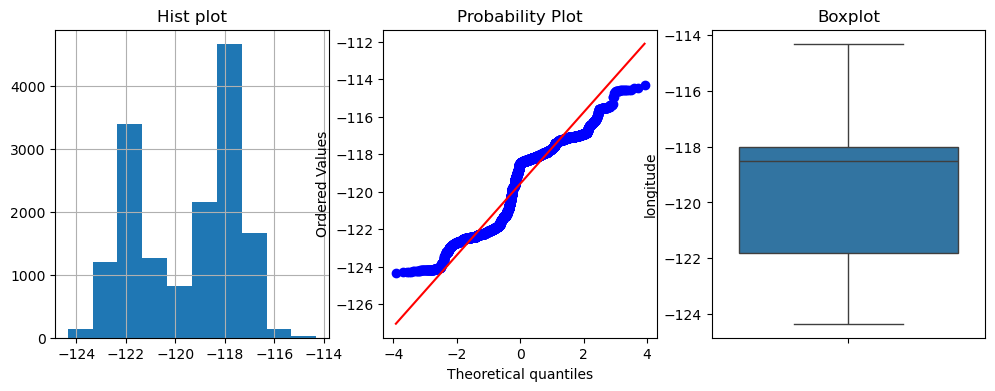

column : latitude


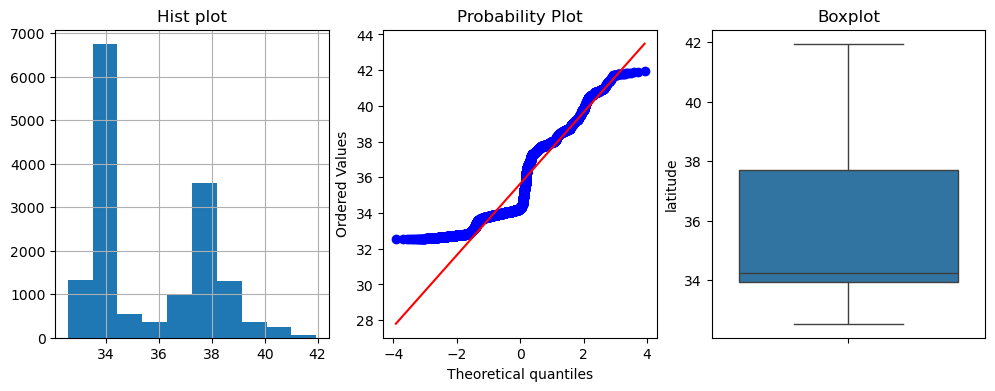

column : housing_median_age


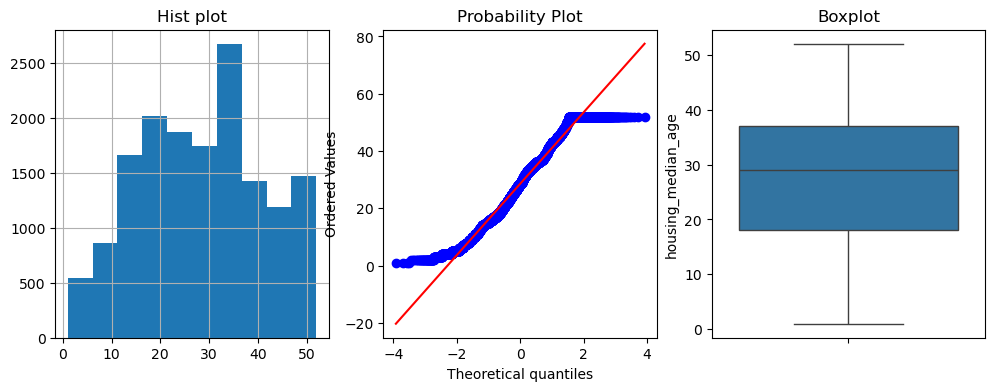

column : total_rooms


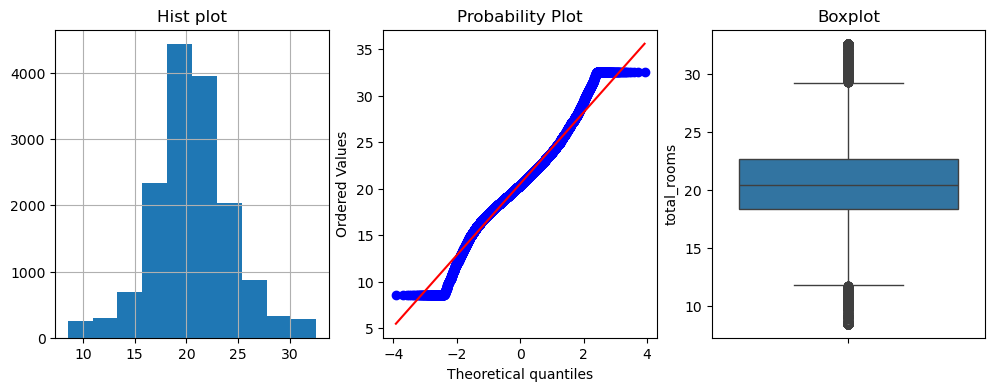

column : total_bedrooms


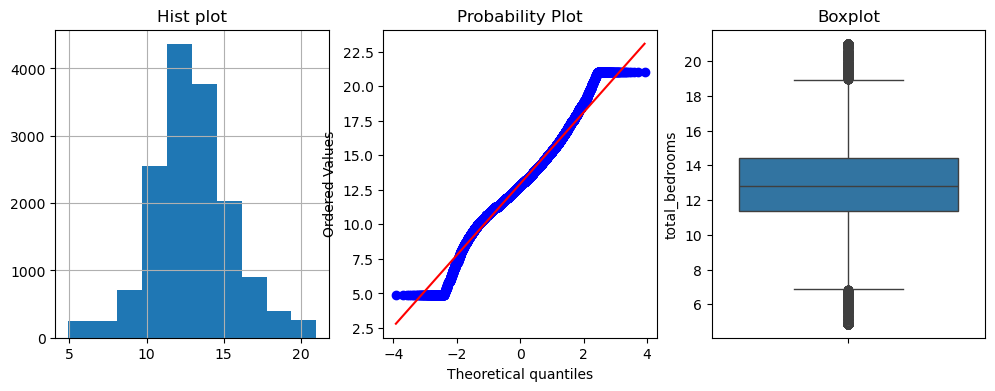

column : population


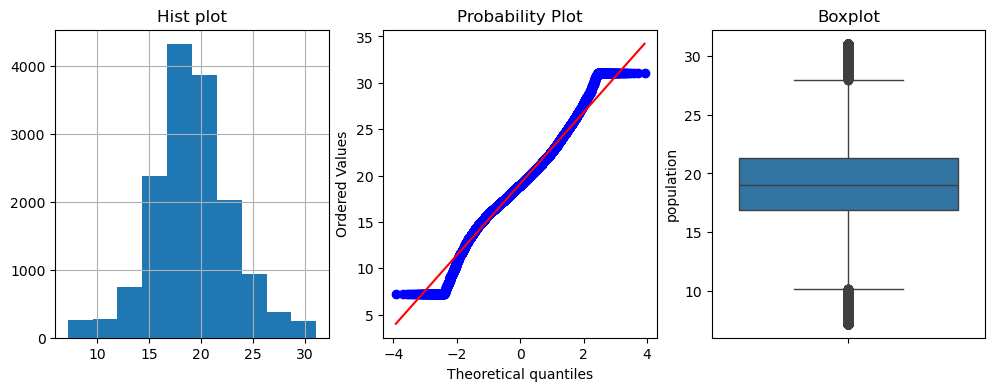

column : households


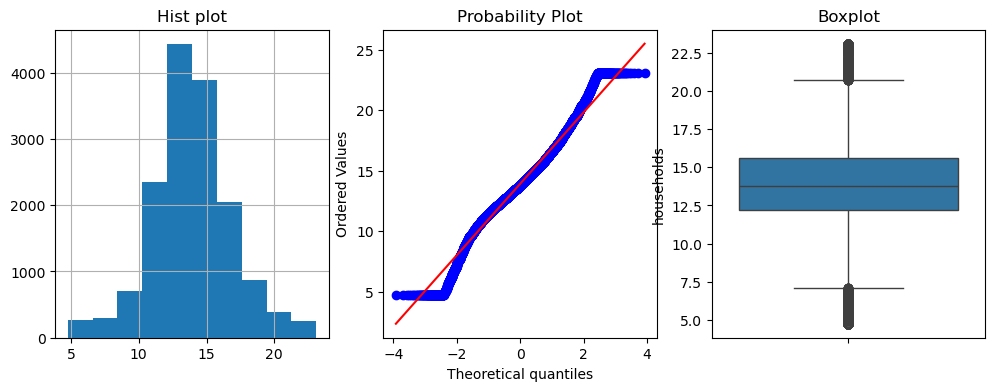

column : median_income


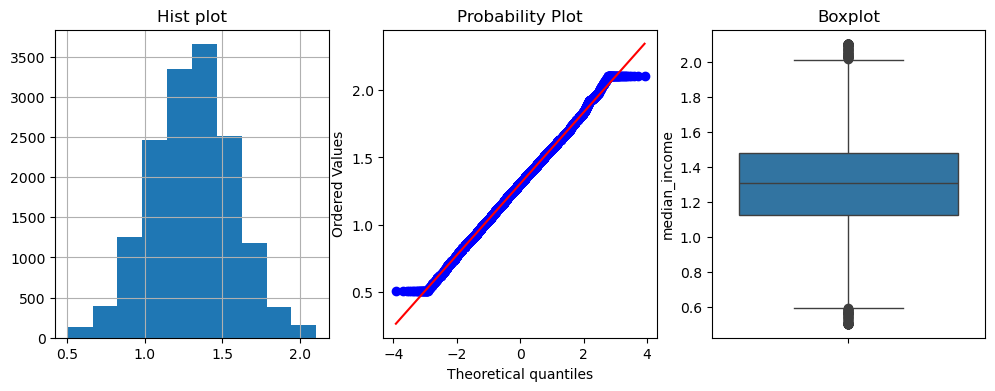

column : median_house_value


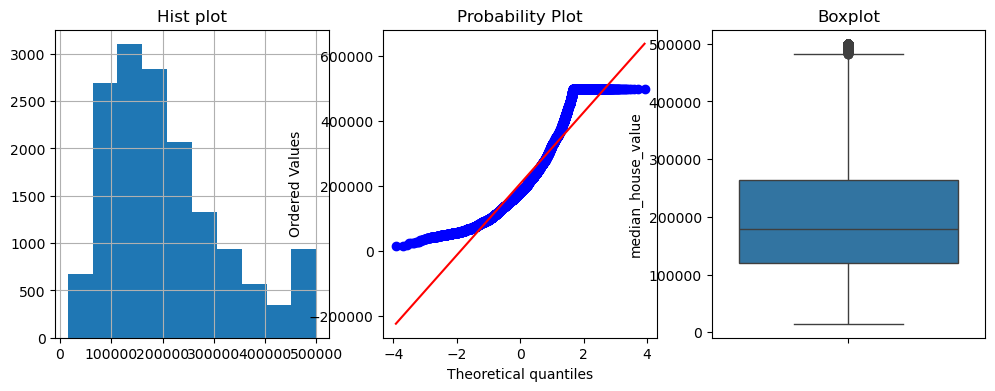

In [28]:
### keeping the data for those columns, only in between 3 std to the left and right
remove_outliers(train_distance, cols_to_tansform)
plot_graphs(train_distance)

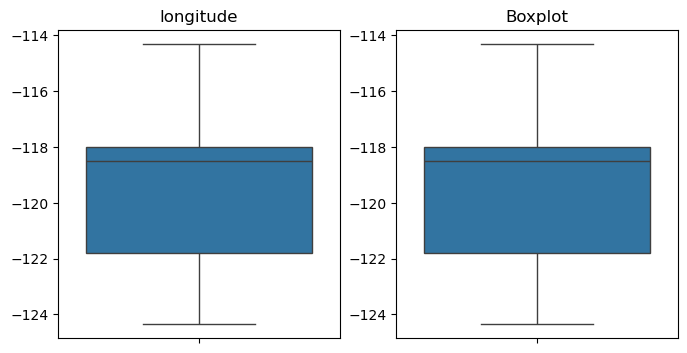

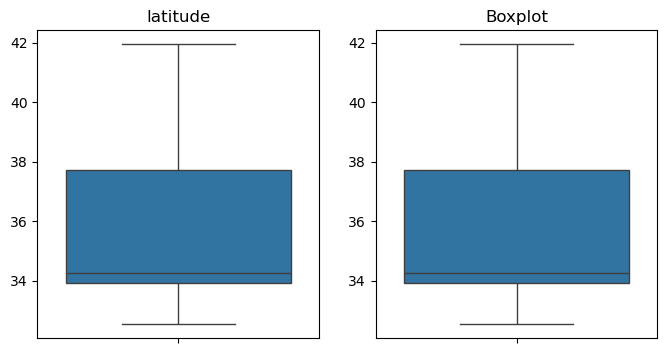

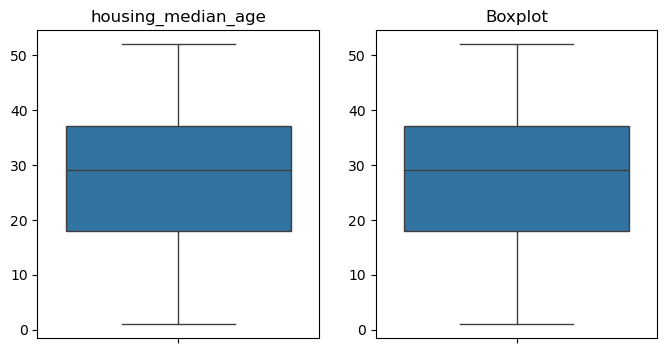

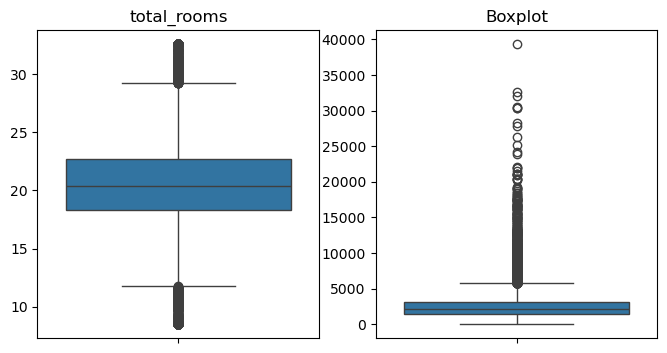

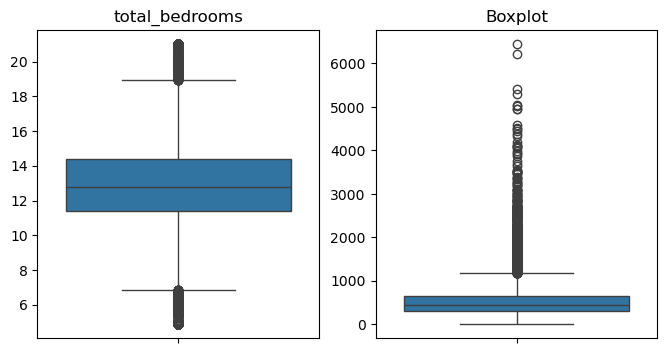

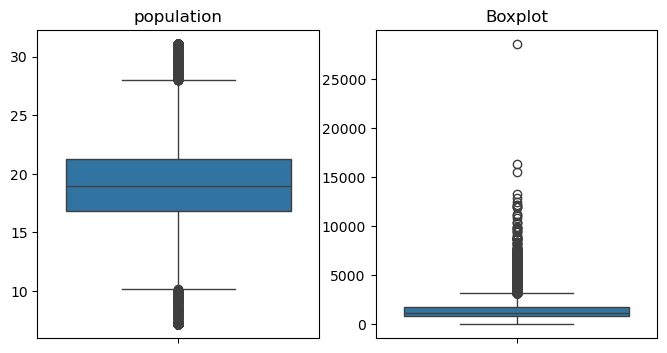

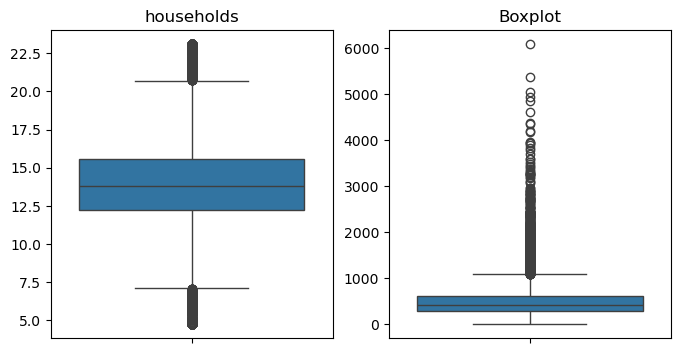

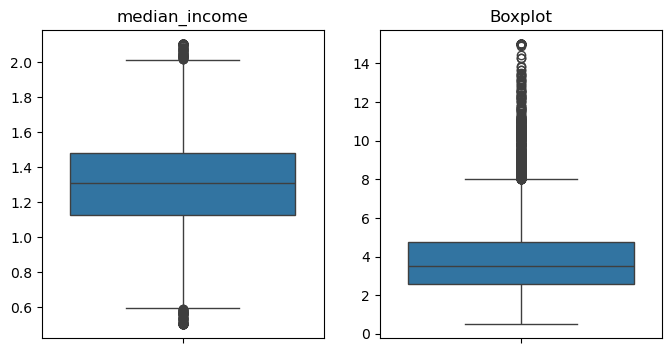

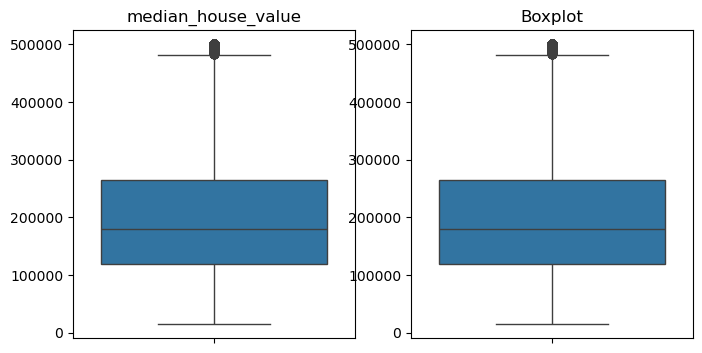

In [29]:
## comparing the data with the original data before transformation
plot_graphs_post_operations(train_distance, train_copy)

In [30]:
### scaling the data : 'median_house_value' 
price_scaler_path = '../scalers/price_scaler.pkl'
scale_train(train_distance, ['median_house_value'], scaler_path = price_scaler_path)
train_distance.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-117.07,32.71,36.0,21.194942,13.178600,19.448080,14.222349,1.126987,0.194022,3
1,-120.05,36.96,37.0,16.532098,10.986256,18.602194,11.495493,0.814349,0.076909,0
2,-122.15,37.74,41.0,15.813680,9.731632,15.271727,10.756101,1.242460,0.238352,2
3,-118.27,33.95,35.0,20.256562,13.332698,21.391763,14.608811,0.839324,0.162063,1
4,-117.01,32.78,20.0,21.579428,14.096047,20.564253,15.390273,1.213222,0.454846,1


In [31]:
### scaling the rest of the columns
rest_scaler_path = '../scalers/rest_scaler.pkl'
cols_to_scale = train_distance.select_dtypes('float64').drop('median_house_value', axis = 1).columns
scale_train(train_distance, cols_to_scale, scaler_path = rest_scaler_path)
train_distance.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0.725100,0.018066,0.686275,0.527198,0.514598,0.513536,0.516168,0.389228,0.194022,3
1,0.428287,0.469713,0.705882,0.333513,0.378638,0.478126,0.367566,0.193900,0.076909,0
2,0.219124,0.552604,0.784314,0.303672,0.300832,0.338705,0.327272,0.461373,0.238352,2
3,0.605578,0.149841,0.666667,0.488220,0.524154,0.594903,0.537229,0.209504,0.162063,1
4,0.731076,0.025505,0.372549,0.543169,0.571494,0.560262,0.579815,0.443106,0.454846,1


column : longitude


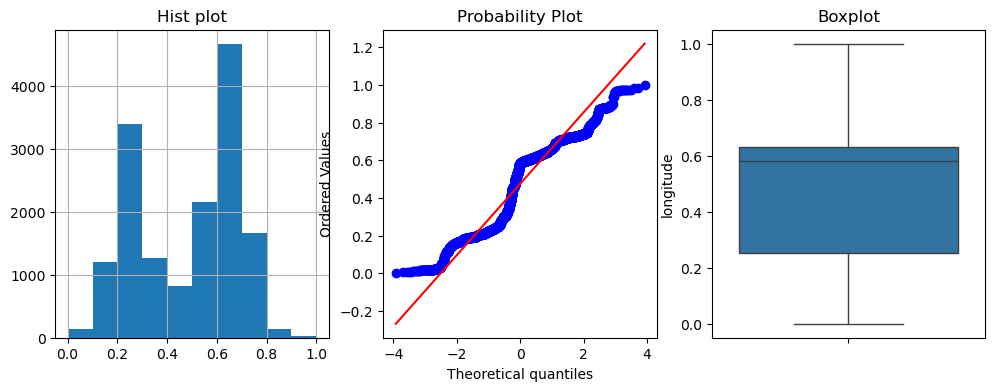

column : latitude


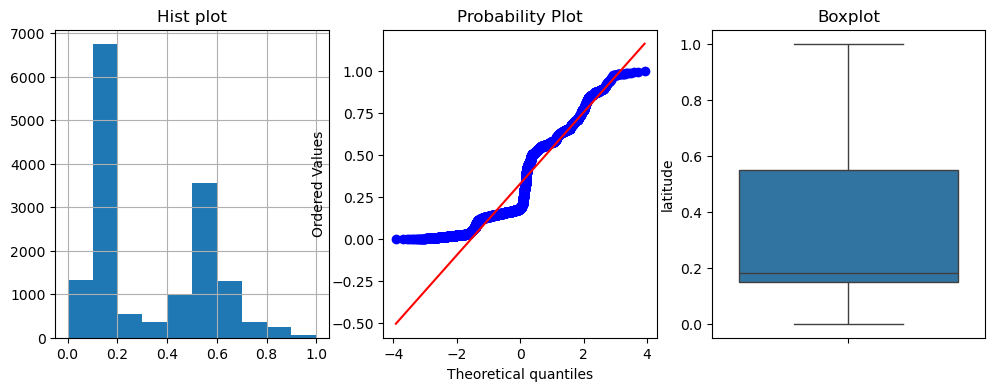

column : housing_median_age


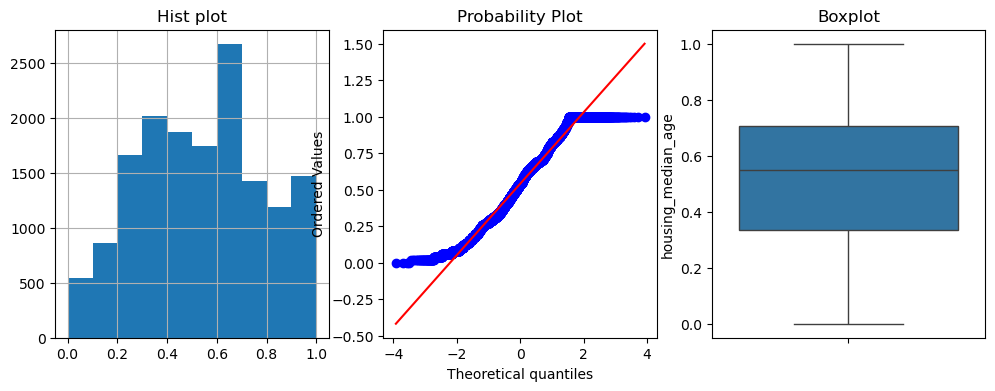

column : total_rooms


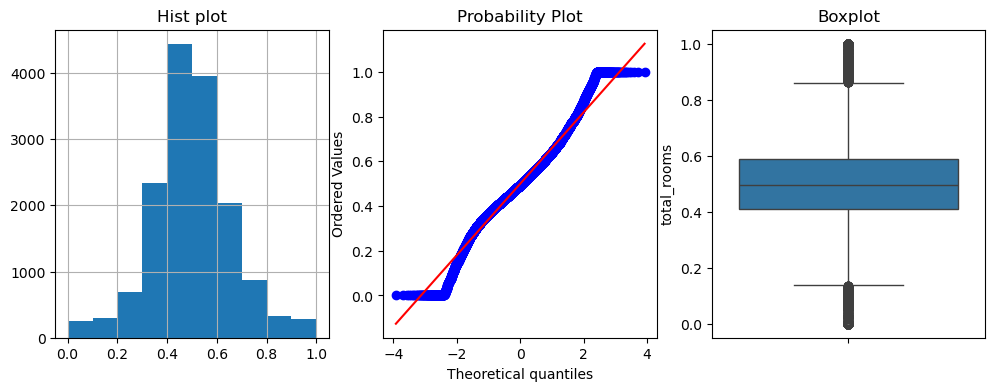

column : total_bedrooms


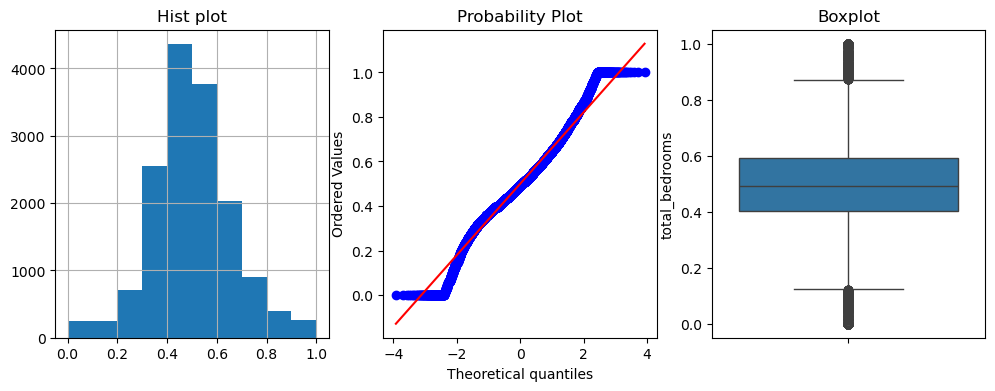

column : population


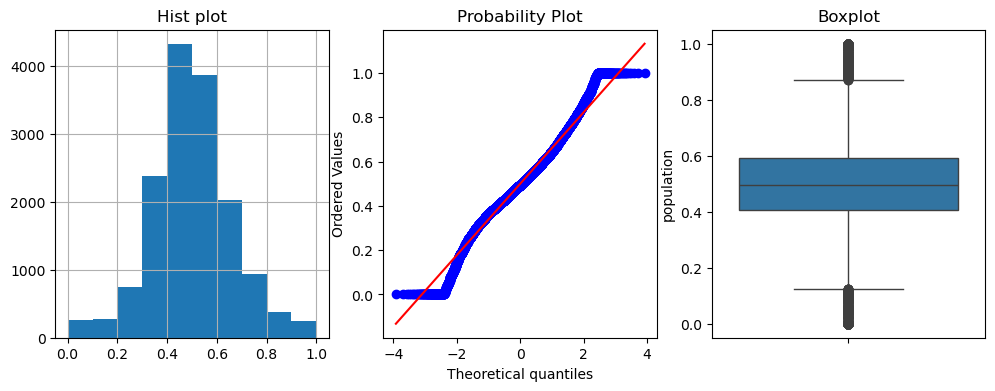

column : households


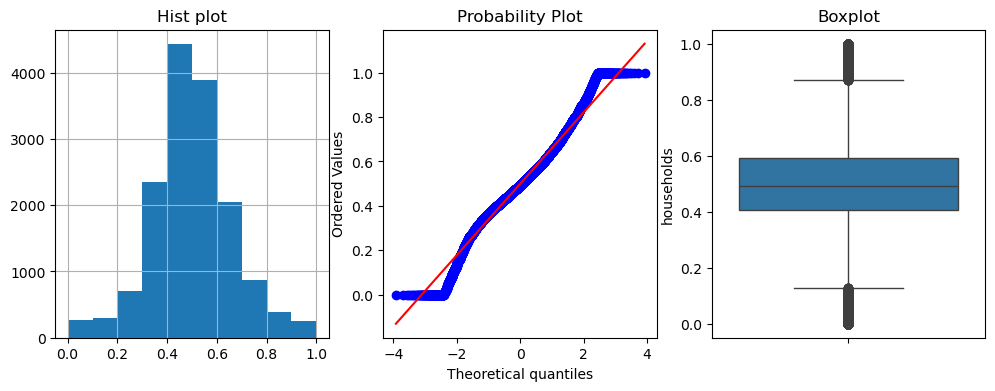

column : median_income


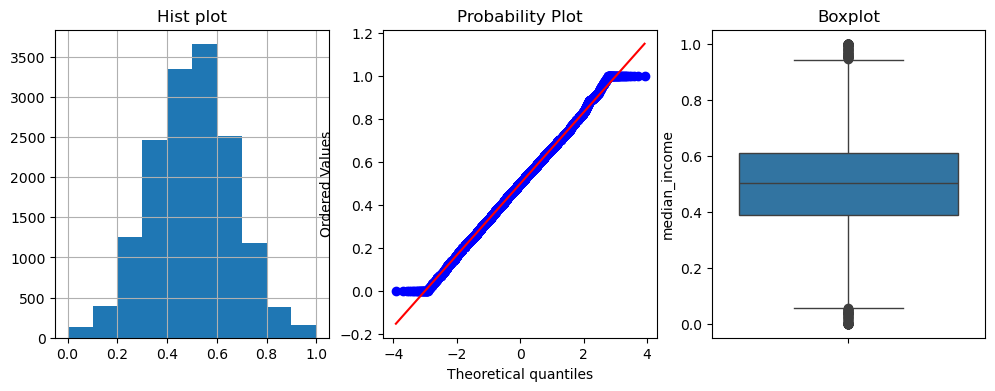

column : median_house_value


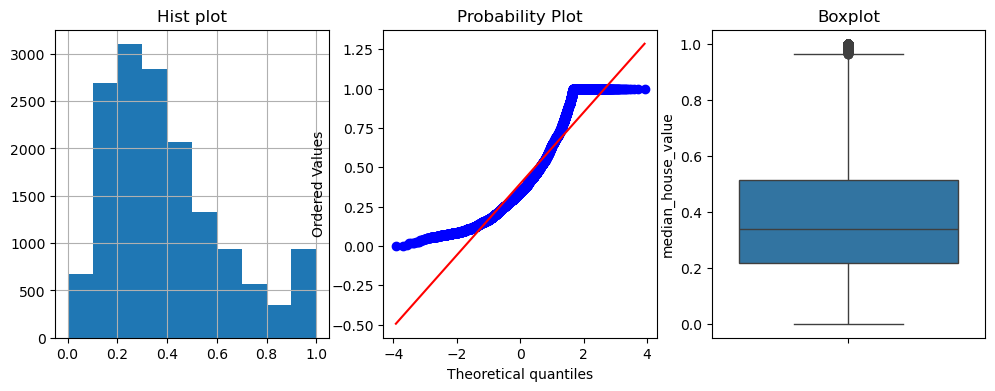

In [32]:
### plotting the graphs
plot_graphs(train_distance)

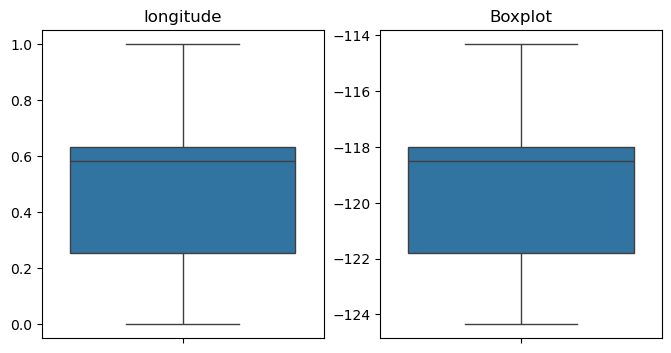

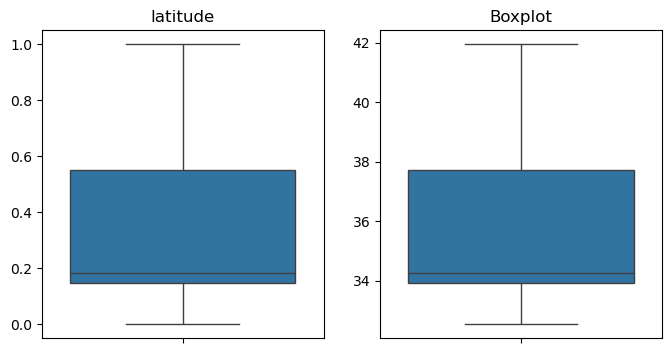

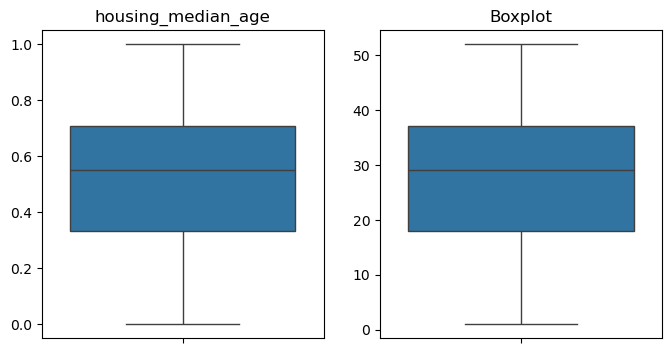

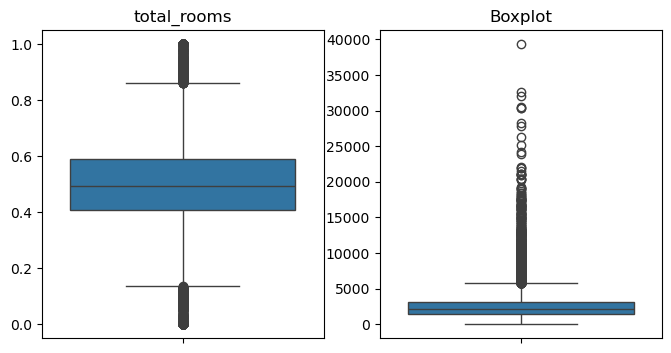

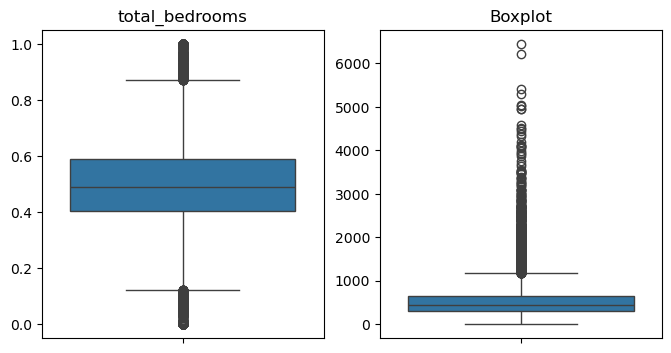

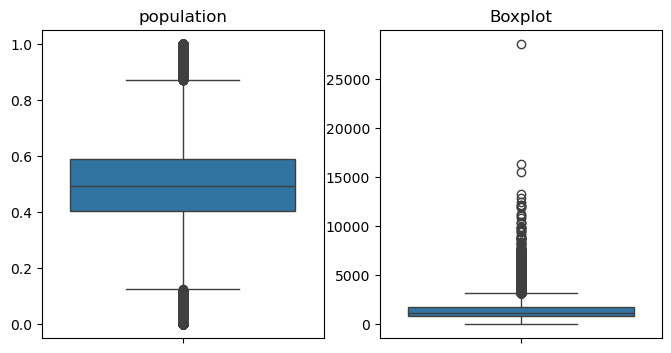

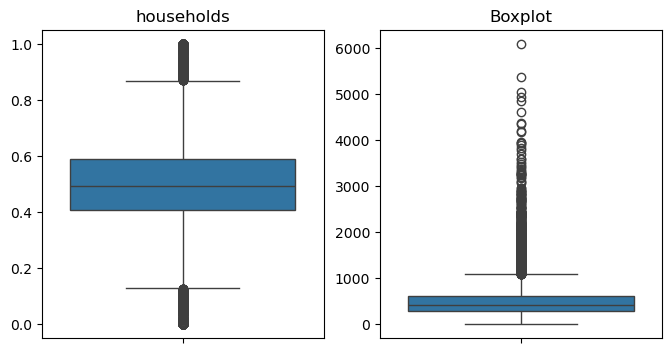

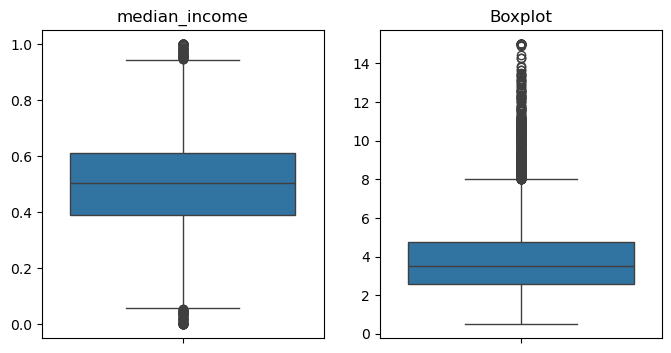

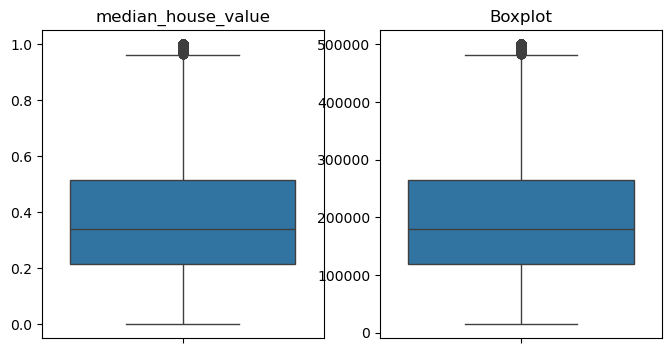

In [33]:
### plotting the graphs vs the original data (train_copy)
plot_graphs_post_operations(train_distance, train_copy)

In [34]:
### saving the data for the distance based models
### setting up the path
train_distance_path = '../data/model_ready/train_distance.csv'
save_data(train_distance, train_distance_path)

In [35]:
### loading it up again and checking it out
train_distance = load_data(train_distance_path)
train_distance.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0.725100,0.018066,0.686275,0.527198,0.514598,0.513536,0.516168,0.389228,0.194022,3
1,0.428287,0.469713,0.705882,0.333513,0.378638,0.478126,0.367566,0.193900,0.076909,0
2,0.219124,0.552604,0.784314,0.303672,0.300832,0.338705,0.327272,0.461373,0.238352,2
3,0.605578,0.149841,0.666667,0.488220,0.524154,0.594903,0.537229,0.209504,0.162063,1
4,0.731076,0.025505,0.372549,0.543169,0.571494,0.560262,0.579815,0.443106,0.454846,1


In [36]:
### checking up the things
get_nan_duplicates_shape(train_distance)

shape : (15480, 10) 
duplicates : 0 
Nan values : 
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
